# Logistic and Delivery : Happy Customer

Data Description:
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers.

X1 = My order was delivered on time.

X2 = Contents of my order was as I expected.

X3 = I ordered everything I wanted to order.

X4 = I paid a good price for my order.

X5 = I am satisfied with my courier.

X6 = the app makes ordering easy for me.

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Success Metrics:

Reach 73% accuracy score or above.

Find which questions/features are more important when predicting a customer’s happiness.

## Imports

In [1]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

C:\Users\hkim1\AppData\Roaming\Python\Python36\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load the dataset

In [2]:
# Load the dataset

file_path = '../data/ACME-HappinessSurvey2020.csv'
df = pd.read_csv(file_path)

# Print datatypes
print(df.dtypes)

# Describe columns
df.describe(include='all')

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object


,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [3]:
df.count()

Y     126
X1    126
X2    126
X3    126
X4    126
X5    126
X6    126
dtype: int64

In [4]:
# Preview the dataset
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


## 01 Exploratory Data Analysis

In [5]:
df[["X1","X2","X3","X4","X5","X6"]].describe()

,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


X1: 25% of the data are below 4, 50% are below 5, and 75% are below 5

X2: 25% of the data are below 2, 50% are below 3, and 75% are below 3

X3: 25% of the data are below 3, 50% are below 3, and 75% are below 4

X4: 25% of the data are below 3, 50% are below 4, and 75% are below 4

X5: 25% of the data are below 3, 50% are below 4, and 75% are below 4

x6: 25% of the data are below 4, 50% are below 4, and 75% are below 5

summary of X4 and X5 is similar

X4 = I paid a good price for my order, X5 = I am satisfied with my courier.

### Label Class

In [6]:
label_pct = df['Y'].value_counts(normalize = True)*100
label_ct =  df['Y'].value_counts()
pd.DataFrame(
    {
        'labels': label_pct.index, 
        'count': label_ct.values, 
        'percentage': label_pct.values,
    }
)

,labels,count,percentage
0,1,69,54.761905
1,0,57,45.238095


54.8% of the data are in category 1, while 45.2% are in category 0, thus the data is relatively balanced

C:\Users\hkim1\AppData\Roaming\Python\Python36\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


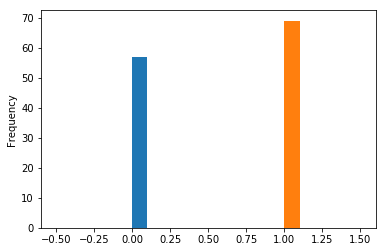

In [7]:
pos = df['Y'].to_numpy() == 1
neg = df['Y'].to_numpy() == 0
df["Y"][neg].plot(kind = 'hist')
df["Y"][pos].plot(kind = 'hist')


### X1 Rating 

My order was delivered on time.

In [8]:
x1_rating_pct = df['X1'].value_counts(normalize = True)*100
x1_rating_ct =  df['X1'].value_counts()
pd.DataFrame(
    {
        'Rating': x1_rating_pct.index, 
        'count': x1_rating_ct.values, 
        'percentage': x1_rating_pct.values,
    }
)

,Rating,count,percentage
0,5,65,51.587302
1,4,40,31.746032
2,3,20,15.873016
3,1,1,0.793651


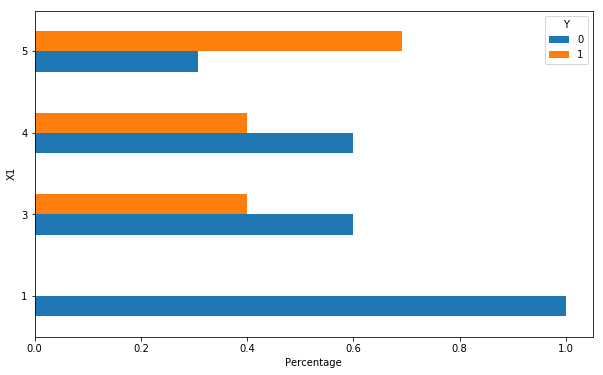

In [9]:
pvt1 = pd.crosstab(index = df['X1'], columns = df['Y'], normalize= 'index')
pvt1.plot(kind = 'barh', stacked = False, figsize = (10,6))
plt.xlabel('Percentage')
plt.show()

### X2 Rating

Contents of my order was as I expected.

In [10]:
x2_rating_pct = df['X2'].value_counts(normalize = True)*100
x2_rating_ct =  df['X2'].value_counts()
pd.DataFrame(
    {
        'Rating': x2_rating_pct.index, 
        'count': x2_rating_ct.values, 
        'percentage': x2_rating_pct.values,
    }
)

,Rating,count,percentage
0,3,42,33.333333
1,2,34,26.984127
2,1,27,21.428571
3,4,17,13.492063
4,5,6,4.761905


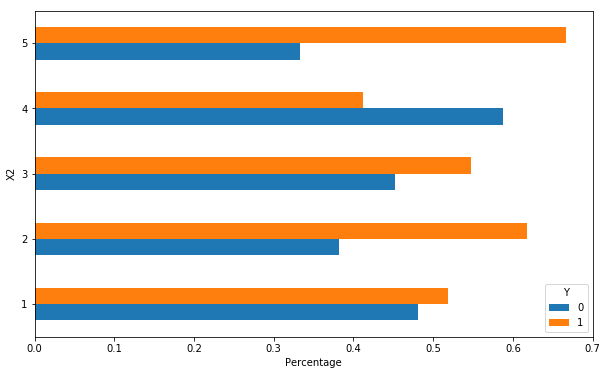

In [11]:
pvt2 = pd.crosstab(index = df['X2'], columns = df['Y'], normalize= 'index')
pvt2.plot(kind = 'barh', stacked = False, figsize = (10,6))
plt.xlabel('Percentage')
plt.show()

### X3 Rating

I ordered everything I wanted to order.

In [12]:
x3_rating_pct = df['X3'].value_counts(normalize = True)*100
x3_rating_ct =  df['X3'].value_counts()
pd.DataFrame(
    {
        'Rating': x3_rating_pct.index, 
        'count': x3_rating_ct.values, 
        'percentage': x3_rating_pct.values,
    }
)

,Rating,count,percentage
0,3,55,43.650794
1,4,33,26.190476
2,5,17,13.492063
3,2,14,11.111111
4,1,7,5.555556


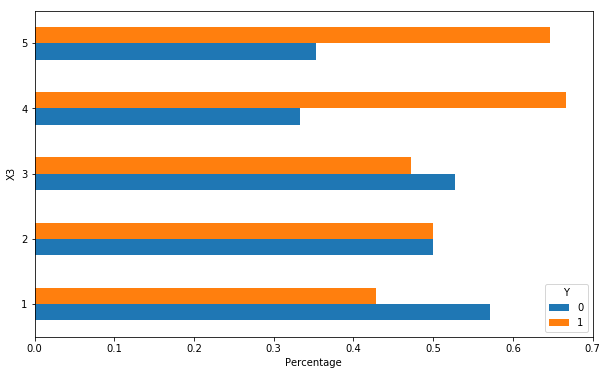

In [13]:
pvt3 = pd.crosstab(index = df['X3'], columns = df['Y'], normalize= 'index')
pvt3.plot(kind = 'barh', stacked = False, figsize = (10,6))
plt.xlabel('Percentage')
plt.show()

### X4 Rating

I paid a good price for my order.

In [14]:
x4_rating_pct = df['X4'].value_counts(normalize = True)*100
x4_rating_ct =  df['X4'].value_counts()
pd.DataFrame(
    {
        'Rating': x4_rating_pct.index, 
        'count': x4_rating_ct.values, 
        'percentage': x4_rating_pct.values,
    }
)

,Rating,count,percentage
0,4,53,42.063492
1,3,41,32.539683
2,5,25,19.841270
3,2,5,3.968254
4,1,2,1.587302


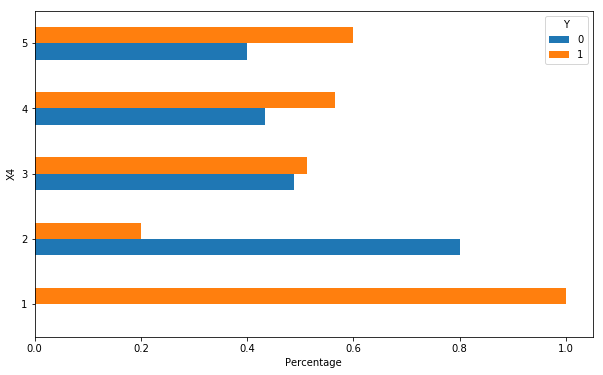

In [15]:
pvt4 = pd.crosstab(index = df['X4'], columns = df['Y'], normalize= 'index')
pvt4.plot(kind = 'barh', stacked = False, figsize = (10,6))
plt.xlabel('Percentage')
plt.show()

### X5 Rating

I am satisfied with my courier.

In [16]:
x5_rating_pct = df['X5'].value_counts(normalize = True)*100
x5_rating_ct =  df['X5'].value_counts()
pd.DataFrame(
    {
        'Rating': x5_rating_pct.index, 
        'count': x5_rating_ct.values, 
        'percentage': x5_rating_pct.values,
    }
)

,Rating,count,percentage
0,4,50,39.682540
1,5,31,24.603175
2,3,22,17.460317
3,2,16,12.698413
4,1,7,5.555556


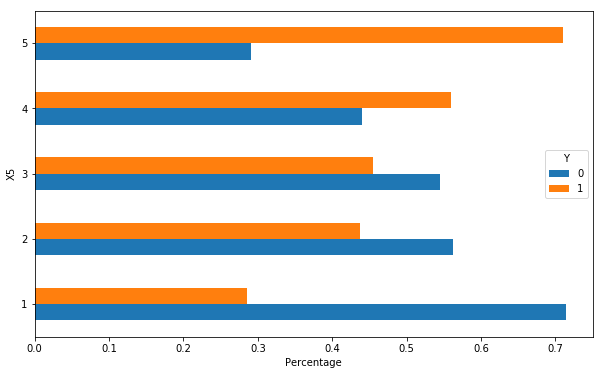

In [17]:
pvt5 = pd.crosstab(index = df['X5'], columns = df['Y'], normalize= 'index')
pvt5.plot(kind = 'barh', stacked = False, figsize = (10,6))
plt.xlabel('Percentage')
plt.show()

### X6 Rating

The app makes ordering easy for me.

In [18]:
x6_rating_pct = df['X6'].value_counts(normalize = True)*100
x6_rating_ct =  df['X6'].value_counts()
pd.DataFrame(
    {
        'Rating': x6_rating_pct.index, 
        'count': x6_rating_ct.values, 
        'percentage': x6_rating_pct.values,
    }
)

,Rating,count,percentage
0,5,57,45.238095
1,4,47,37.301587
2,3,20,15.873016
3,2,1,0.793651
4,1,1,0.793651


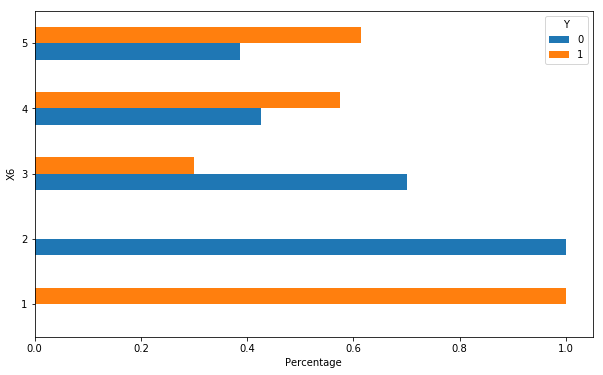

In [19]:
pvt6 = pd.crosstab(index = df['X6'], columns = df['Y'], normalize= 'index')
pvt6.plot(kind = 'barh', stacked = False, figsize = (10,6))
plt.xlabel('Percentage')
plt.show()

### X1-X6 Scatter Plot

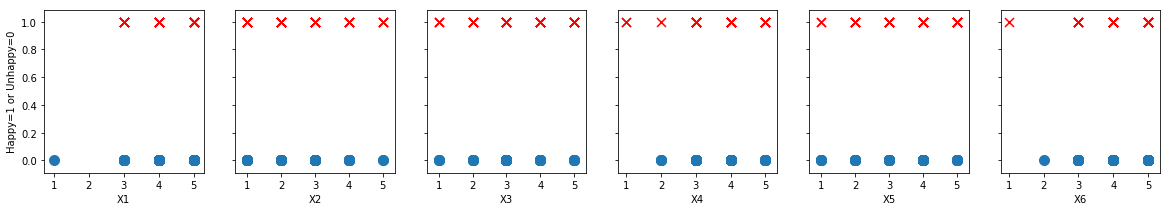

In [20]:
X_features = ['X1','X2','X3','X4','X5','X6']
pos = df['Y'].to_numpy() == 1
neg = df['Y'].to_numpy() == 0
# Target vs features
fig,ax=plt.subplots(1, 6, figsize=(20, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(df[X_features[i]].to_numpy()[pos], df['Y'].to_numpy()[pos], marker='x', s=80, c = 'red', label="y=1")
    ax[i].scatter(df[X_features[i]].to_numpy()[neg], df['Y'].to_numpy()[neg], marker='o', s=100, label="y=0")
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Happy=1 or Unhappy=0")
plt.show()

## 02 Model Performance

In [21]:
# Split feature and target vectors
X = df.drop("Y", 1)
Y = df["Y"]

In [22]:
def fit_model(X, Y):
    '''Use model.'''
    
    # define the model to use
    model = RandomForestClassifier(n_estimators = 10, criterion = "entropy", max_depth = 5, random_state=47)
    
    # Train the model
    model.fit(X, Y)
    
    return model

In [23]:
def calculate_metrics(model, X_test, Y_test):
    '''Get model evaluation metrics on the test set.'''
    
    # Get model predictions
    y_predict_r = model.predict(X_test)
    
    # Calculate evaluation metrics for assesing performance of the model.
    acc = accuracy_score(Y_test, y_predict_r)
    roc = roc_auc_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    
    return acc, roc, prec, rec, f1

In [24]:
def train_and_get_metrics(X, Y):
    '''Train model and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    #scaler = StandardScaler().fit(X_train)
    #X_train_scaled = scaler.transform(X_train)
    #X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train, Y_train)

    # Make predictions on test dataset and calculate metrics.
    acc_test, roc_test, prec_test, rec_test, f1_test = calculate_metrics(model, X_test, Y_test)

    acc_train, roc_train, prec_train, rec_train, f1_train = calculate_metrics(model, X_train, Y_train)


    return acc_test, roc_test, prec_test, rec_test, f1_test, acc_train, roc_train, prec_train, rec_train, f1_train

In [25]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    acc_test, roc_test, prec_test, rec_test, f1_test, acc_train, roc_train, prec_train, rec_train, f1_train = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df_test = pd.DataFrame([[acc_test, roc_test, prec_test, rec_test, f1_test, X.shape[1]]], columns=["Accuracy_test", "ROC_test", "Precision_test", "Recall_test", "F1 Score_test", 'Feature Count'])
    

    display_df_train = pd.DataFrame([[acc_train, roc_train, prec_train, rec_train, f1_train, X.shape[1]]], columns=["Accuracy_train", "ROC_train", "Precision_train", "Recall_train", "F1 Score_train", 'Feature Count'])
    



    return display_df_test, display_df_train 

### All Features

In [26]:
# Calculate evaluation metrics
all_features_eval_df, all_features_eval_df_train  = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

all_features_eval_df_train.index = ['All features']


# Initialize results dataframe
results_test = all_features_eval_df

results_train = all_features_eval_df_train

# Check the metrics
results_test.head()
#results_train.head()

,Accuracy_test,ROC_test,Precision_test,Recall_test,F1 Score_test,Feature Count
All features,0.538462,0.529762,0.5625,0.642857,0.6,6


In [27]:
results_train.head()

,Accuracy_train,ROC_train,Precision_train,Recall_train,F1 Score_train,Feature Count
All features,0.82,0.806061,0.776119,0.945455,0.852459,6


### Feature Importance

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42)

In [29]:
feature_names = ["X1", "X2", "X3", "X4", "X5", "X6"] 
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [30]:


start_time = time.time()
importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


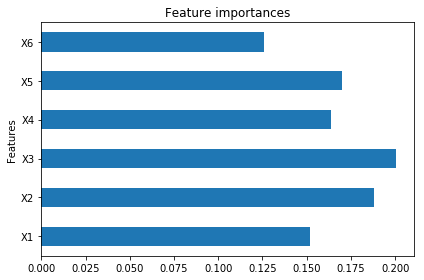

In [31]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Features")
fig.tight_layout()

The feature shows all feautrues are closely important, however top four important features will be selected

In [32]:
# Important features
imp_features_names = ["X2", "X3", "X4", "X5"]


# Calculate and check evaluation metrics
imp_features_eval_df, imp_features_eval_df_train = evaluate_model_on_features(df[imp_features_names], Y)
imp_features_eval_df.index = ['Important features']

imp_features_eval_df_train.index = ['Important features']



# Append to results and display
results_test = results_test.append(imp_features_eval_df)

results_train = results_train.append(imp_features_eval_df_train)

results_test.head(n=10)

,Accuracy_test,ROC_test,Precision_test,Recall_test,F1 Score_test,Feature Count
All features,0.538462,0.529762,0.5625,0.642857,0.6,6
Important features,0.538462,0.529762,0.5625,0.642857,0.6,4


In [33]:
results_train.head(n=10)

,Accuracy_train,ROC_train,Precision_train,Recall_train,F1 Score_train,Feature Count
All features,0.82,0.806061,0.776119,0.945455,0.852459,6
Important features,0.77,0.764646,0.775862,0.818182,0.796460,4


### Subset of data using correlation

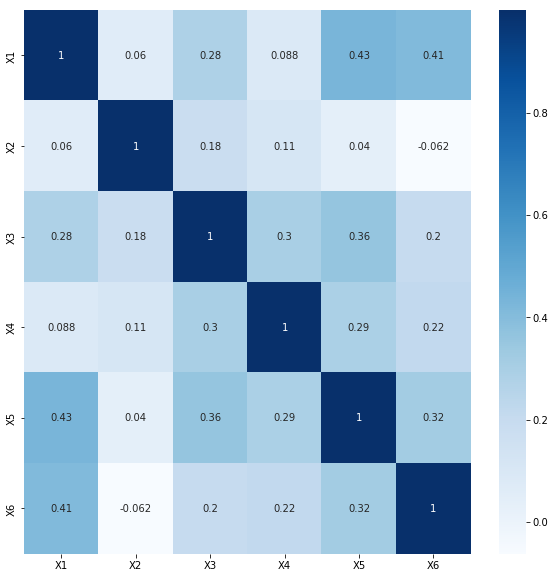

In [34]:
# Set figure size
plt.figure(figsize=(10,10))

# Calculate the correlation matrix for target relevant features that you previously determined
df_new = df.drop("Y", 1)
new_corr = df_new.corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

X5 is highly correlated with X4 and X3.
Retain X5 and remove X4 and X3

In [35]:
# Remove the features with high correlation to other features
subset_feature_corr_names = ["X1", "X2", "X5", "X6"]


# Calculate and check evaluation metrics
subset_feature_eval_df, subset_feature_eval_df_train = evaluate_model_on_features(df[subset_feature_corr_names], Y)
subset_feature_eval_df.index = ['Subset features']

subset_feature_eval_df_train.index = ['Subset features']



# Append to results and display
results_test = results_test.append(subset_feature_eval_df)

results_train = results_train.append(subset_feature_eval_df_train)

results_test.head(n=10)

,Accuracy_test,ROC_test,Precision_test,Recall_test,F1 Score_test,Feature Count
All features,0.538462,0.529762,0.562500,0.642857,0.600000,6
Important features,0.538462,0.529762,0.562500,0.642857,0.600000,4
Subset features,0.769231,0.767857,0.785714,0.785714,0.785714,4


In [36]:
results_train.head(n=10)

,Accuracy_train,ROC_train,Precision_train,Recall_train,F1 Score_train,Feature Count
All features,0.82,0.806061,0.776119,0.945455,0.852459,6
Important features,0.77,0.764646,0.775862,0.818182,0.796460,4
Subset features,0.78,0.767677,0.753846,0.890909,0.816667,4


## Summary

The data set is small with 126 data points. The data was divided into 80% training and 20% test set.

Exploring the label class showed, 54.8% of the data are in category 1, while 45.2% are in category 0, thus the data is relatively balanced

Scatter plot of ratings(1-5) for X1 - X6 didnt provide any intuitive insight as there was no clear division to indicate a customer will be happy or not

Accuracy on both training and test set was explored; Subset features ["X1", "X2", "X5", "X6"] provided the highest test set accuracy of 76.9% 
with corresponding training set accuracy of 78%, thus the features to keep are:

X1 = my order was delivered on time.

X2 = contents of my order was as I expected.

X5 = I am satisfied with my courier.

X6 = the app makes ordering easy for me.

## References

[1] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[2] https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

[3] https://github.com/Owerre/imbalanced-learning/blob/master/imbalanced-learning/notebooks/02_exploratory_data_analysis.ipynb
